# Is adopting a healthier lifestyle a long-term social change?

### EPFL CS-401 : Applied Data Analysis Project

### Authors:
* **Alain Birchmeier**
* **Valentin Moullet**
* **Dario Anongba Varela**

### Abstract

The idea of the project is to assess whether the population of western countries is adopting a healthier lifestyle. This project aims to determine if this adoption is a trend or a long-term social change. In either cases, we will try to predict the evolution of this behavior over the upcoming years.

In order to achieve that goal, we will use the Amazon reviews dataset. From those reviews, we can extract information about consumer satisfaction, dates, product categories and the enthousiasm for certain products.

With the emergence of new institutions promoting healthy lifes (like vegan shops or fitness centers), finding insights and patterns in people's behavior could be useful to define in which direction this social change is heading.

### All the data preprocessing is done in the file **data_preprocessing.py** for convenience. We will load the data directly from pickles in this notebook. Careful: If you want to get them on your computer, you first have to download the different files [there](http://jmcauley.ucsd.edu/data/amazon/links.html), put them into a folder called 'data/', and then you have to run the code in **Data_Preprocessing**!

## Imports, constants and Utilitary functions

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import gzip
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import datetime
import os
from tqdm import tqdm_notebook as tqdm
from helpers import *
rcParams['figure.figsize']=(15, 5)
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
DATA_DIR = 'data/'
PLOT_DIR = 'plots/'

## Preprocessing

We use some preprocessing to accelerate the computation of this notebook.
The first task is to task is to collect data from Amazon, organise this data and store it in a ready-to-use data format (pickes).

To achieve this, we do the following:
* Load the reviews data into dataframes
* Load the products metadata into dataframes
* Filter the reviews and products to only keep products considered "healthy"
* Merge the metadata and the reviews into a single dataframe
* Store the dataframe in the picke format

We decided to restrict our analysis by choosing reviews and products from the **Grocery and Gourmet Food** and **Sports and Outdoors** categories as these categories are more representative of healthy lifestyle than the others.


#### The Grocery and Gourmet Food category

We see that the different categories in the 'Grocery & Gourmet Food' file are not directly useful, because:
1. They are not directly telling us if the food is a healthy one or not
2. We see that a lot of reviews are about products that are not in a category (except for the main one 'Grocery & Gourmet Food')
    
In order to get the reviews related to a healthy product in this file, we can try the following: we could read the title (and/or description) of all products in the metadata and find the ones containing some keyword related to a healthy lifestyle (e.g. "organic", "natural", ...). Once we have those products, we can keep only the reviews about those products (using the 'asin' value).

#### The Sports and Outdoors category

The Sports and Outdoors file contains categories that seem easy to categorize into healthy (or not), e.g. 'Exercise & Fitness' or 'Cycling', plus the products seem to be in more precise categories (not like in the 'Grocery & Gourmet Food' file). Thus, in order to get all reviews about products related to an healthy lifestyle, we could take all the reviews about a product that is in one of the 'healthy' categories, and we can choose those healthy categories manually.

With our utilitary functions ready, we can store the data into pickles. The created files are the following:
* **food_reviews_df**: A file containing all the reviews of the Food category
* **food_meta_df**: A file containing all the reviews of the Food category
* **sports_reviews_df**: A file containing all the reviews of the Sports category
* **sports_meta_df**: A file containing all the reviews of the Sports category
* **healthy_food_df**: A file containing the merged information about healthy products and reviews of the Food category
* **healthy_sports_df**: A file containing the merged information about healthy products and reviews of the Sports category

#### Overall statistics

To generate some statistics over all the Amazon data set we need to stream all file (~16 Gb) and keep only information we need. The statistics we generate are :
- number of new reviews / users / products per month
- number of active reviews / users / products per month
- total number of reviews / users / products per month

## Raw data

The first task is to collect the Amazon data, organise this data and store it in a ready-to-use data format (pickles). The data is first collected in JSON format, then transformed into Pandas DataFrame, which is finally stored locally as a Pickle.

To achieve this, we do the following:
* Load the reviews data into dataframes
* Load the products metadata into dataframes
* Store the dataframes into Pickle format

Since this analysis is about healthy lifestyles, we will mostly focus on products and reviews from two main categories: **Grocery and Gourmet Food** and **Sports and Outdoors**. As for the distribution, we observed that the amount of data is more important in the **Sports and Outdoors** category than the **Grocery and Gourmet Food**.

In [3]:
# Food
food_reviews_df = pd.read_pickle(DATA_DIR + 'food_reviews_df')
food_meta_df = pd.read_pickle(DATA_DIR + 'food_meta_df')
food_meta_df = add_launch(food_meta_df, food_reviews_df)
food_reviews_df = truncate_date_df(food_reviews_df)
food_meta_df = truncate_date_df(food_meta_df)

In [4]:
# Sports
sports_reviews_df = pd.read_pickle(DATA_DIR + 'sports_reviews_df')
sports_meta_df =  pd.read_pickle(DATA_DIR + 'sports_meta_df')
sports_meta_df = add_launch(sports_meta_df, sports_reviews_df)
sports_reviews_df = truncate_date_df(sports_reviews_df)
sports_meta_df = truncate_date_df(sports_meta_df)

In [5]:
print('Number of reviews for Grocery and Gourmet Food:', food_reviews_df.shape[0])
print('Number of products for Grocery and Gourmet Food:', food_meta_df.shape[0])
print('Number of reviews for Sports and Outdoors:', sports_reviews_df.shape[0])
print('Number of products for Sports and Outdoors:', sports_meta_df.shape[0])

Number of reviews for Grocery and Gourmet Food: 1261574
Number of products for Grocery and Gourmet Food: 163393
Number of reviews for Sports and Outdoors: 3158419
Number of products for Sports and Outdoors: 468270


**Products reviews**

In [6]:
food_reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,datetime
0,A1ZQZ8RJS1XVTX,0657745316,gsxrgirl,"[0, 0]","No sugar, no GMO garbage, no fillers that come...",5.0,Best vanilla I've ever had,1381449600,"10 11, 2013",2013-10-11
1,A31W38VGZAUUM4,0700026444,FIFA Lvr,"[1, 1]","This is my absolute, undisputed favorite tea r...",5.0,Terrific Tea!,1354752000,"12 6, 2012",2012-12-06
2,A3I0AV0UJX5OH0,1403796890,Alicia b,"[0, 0]",I ordered spongbob slippers and I got John Cen...,1.0,grrrrrrr,1385942400,"12 2, 2013",2013-12-02
3,A3QAAOLIXKV383,1403796890,"Danny K. Tilley ""Dan Tilley""","[0, 0]",The cart is fine and works for the purpose for...,3.0,Storage on Wheels Cart,1307836800,"06 12, 2011",2011-06-12
4,AB1A5EGHHVA9M,141278509X,CHelmic,"[1, 1]",This product by Archer Farms is the best drink...,5.0,The best drink mix,1332547200,"03 24, 2012",2012-03-24


**Products metadata**

In [7]:
food_meta_df.head()

,asin,description,title,imUrl,related,salesRank,categories,price,brand,datetime
0,0657745316,This is real vanilla extract made with only 3 ...,100 Percent All Natural Vanilla Extract,http://ecx.images-amazon.com/images/I/41gFi5h0...,{'also_viewed': ['B001GE8N4Y']},{'Grocery & Gourmet Food': 374004},[[Grocery & Gourmet Food]],NaN,NaN,2013-10-11
1,0700026444,"Silverpot Tea, Pure Darjeeling, is an exquisit...",Pure Darjeeling Tea: Loose Leaf,http://ecx.images-amazon.com/images/I/51hs8sox...,NaN,{'Grocery & Gourmet Food': 620307},[[Grocery & Gourmet Food]],NaN,NaN,2012-12-06
2,1403796890,Must have for any WWE Fan\n \n \n \nFeaturing ...,WWE Kids Todler Velvet Slippers featuring John...,http://ecx.images-amazon.com/images/I/518SEST5...,NaN,NaN,[[Grocery & Gourmet Food]],3.99,NaN,2011-06-12
3,141278509X,Infused with Vitamins and Electrolytes Good So...,Archer Farms Strawberry Dragonfruit Drink Mix ...,http://ecx.images-amazon.com/images/I/51CFQIis...,{'also_viewed': ['B0051IETTY']},{'Grocery & Gourmet Food': 620322},[[Grocery & Gourmet Food]],NaN,NaN,2012-03-24
4,1453060375,MiO Energy is your portable energy source givi...,Mio Energy Liquid Water Enhancer Black Cherry ...,http://ecx.images-amazon.com/images/I/51EUsMcn...,"{'also_viewed': ['B006MSEOJ2', 'B005VOOQLO', '...",{'Grocery & Gourmet Food': 268754},[[Grocery & Gourmet Food]],11.99,Mio,2013-03-03


In the reviews, we have different information:
* reviewerID: useful for counting the number of unique users
* asin: useful to link a review to a product
* reviewerName: not useful (will be dropped)
* helpful: not useful (will be dropped)
* reviewText: not useful (will be dropped)
* overall: can be useful to see how people like different products
* summary: not useful (will be dropped)
* unixReviewTime: used for creating a more useful 'datetime' column
* reviewTime: not useful (will be dropped)
* datetime: useful to locate the reviews in time (created from 'unixReviewTime')

In the products metadata, we have other information (about products):
* asin: useful to link a product to a review
* description: useful to determine if a product is healthy or not
* title: useful to determine if a product is healthy or not
* imUrl: not useful (will be dropped)
* related: not useful (will be dropped)
* salesRank: not useful (will be dropped)
* categories: useful to determine if a product is healthy or not
* price: might be useful in the future, we'll keep it (even if quite a lot of missing values)
* brand: too many missing values, not useful enough

## Enrich, filter and transform the data

### Number of reviews per category

First, let's try to see what are the types of products that have been reviewed by people by looking at the different categories in the data from **Grocery and Gourmet Food** and **Sports and Outdoors**.

Note that the **Grocery and Gourmet Food** and **Sports and Outdoors** categories are the root of hierarchy, and all of their related products belong at least to one of those categories. It means that the number of reviews containing the root category will be exactly the number of reviews for the corresponding file.

#### The Grocery and Gourmet Food category

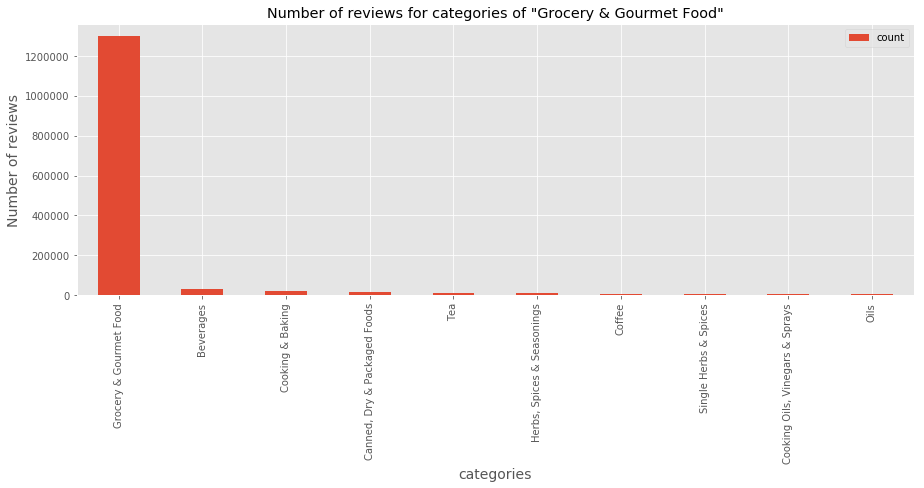

In [8]:
food_cat_count_df = pd.read_pickle(DATA_DIR + 'food_cat_count_df')
food_cat_count_df.head(10).plot(kind='bar', title='Number of reviews for categories of "Grocery & Gourmet Food"')
plt.xlabel('categories', fontsize=14)
plt.ylabel('Number of reviews', fontsize=14)
plt.savefig(PLOT_DIR + 'food_cat_count_df.pdf', bbox_inches='tight')

We see that the different categories in the 'Grocery & Gourmet Food' file are not directly useful, because:
1. They are not directly telling us if the food is a healthy one or not
2. We see that a lot of reviews are about products that are not in a category (except for the root one 'Grocery & Gourmet Food')
    
In order to get the reviews related to a healthy product in this file, we can try the following: we could read the title (and/or description) of all products in the metadata and find the ones containing some keyword related to a healthy lifestyle (e.g. "organic", "natural", ...). Once we have those products, we can keep only the reviews about those products (using the 'asin' value).

#### The Sports and Outdoors category

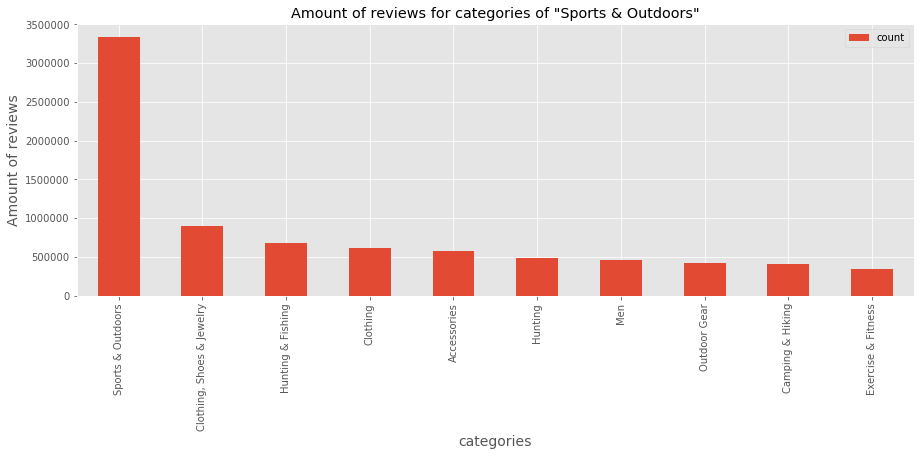

In [9]:
sports_cat_count_df = pd.read_pickle(DATA_DIR + 'sports_cat_count_df')
sports_cat_count_df.head(10).plot(kind='bar', title='Amount of reviews for categories of "Sports & Outdoors"')
plt.xlabel('categories', fontsize=14)
plt.ylabel('Amount of reviews', fontsize=14)
plt.savefig(PLOT_DIR + 'sports_cat_count_df.pdf', bbox_inches='tight')

Contrary to the previous one, we see that the different products of this file are well distributed among non-root categories, which makes it way easier to use those categories to determine if a product is healthy or not, e.g. 'Exercise & Fitness' or 'Cycling', plus the products seem to be in more "precise" categories (not like in the 'Grocery & Gourmet Food' file). Thus, in order to get all reviews about products related to an healthy lifestyle, we could take all the reviews about a product that is in one of the 'healthy' categories, and we can choose those healthy categories manually.

### Getting reviews about healthy products

#### Restricting the time range
We saw that most categories have data only from the year 2003 until the month of July 2014, so we decided to restrict our data within this time range.

In [10]:
# Healthy food
healthy_food_df = truncate_date_df(pd.read_pickle(DATA_DIR + 'healthy_food_df'))

# Healthy sport
healthy_sports_df = truncate_date_df(pd.read_pickle(DATA_DIR + 'healthy_sports_df'))

Now that we have reviews of healthy products from both files, we can concatenate them and use those as our healthy reviews.

In [11]:
# Merge DFs
merged_healthy_df = pd.concat([healthy_food_df, healthy_sports_df])
print("Amount of reviews about healthy products:", merged_healthy_df.shape[0])
merged_healthy_df.head()

Amount of reviews about healthy products: 1332644


,asin,title,categories,price,reviewerID,overall,datetime
0,0657745316,100 Percent All Natural Vanilla Extract,[[Grocery & Gourmet Food]],NaN,A1ZQZ8RJS1XVTX,5.0,2013-10-11
1,141278509X,Archer Farms Strawberry Dragonfruit Drink Mix ...,[[Grocery & Gourmet Food]],NaN,AB1A5EGHHVA9M,5.0,2012-03-24
2,1453060375,Mio Energy Liquid Water Enhancer Black Cherry ...,[[Grocery & Gourmet Food]],11.99,A3DTB6RVENLQ9Q,1.0,2013-03-03
3,3295000018,"Kiva Gourmet Smoked, Ghost Chili Pepper Powder...",[[Grocery & Gourmet Food]],14.80,A1Z77SA1BLL25L,4.0,2014-05-09
4,3295000018,"Kiva Gourmet Smoked, Ghost Chili Pepper Powder...",[[Grocery & Gourmet Food]],14.80,A1GDHUUBM6E4EC,5.0,2014-06-16


### Reviews over time

As a naive analysis, we can try to show the number of reviews over time for both root categories and for the merge of them, and deduce from those plots the growth of healthy lifestyle.

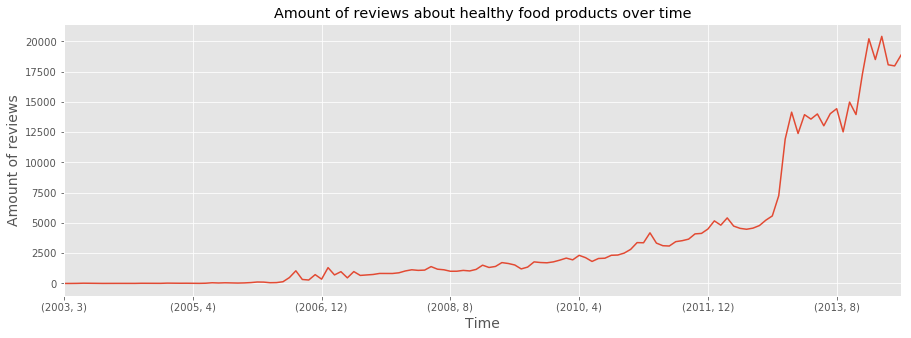

In [12]:
healthy_food_df.groupby([healthy_food_df.datetime.dt.year,
                         healthy_food_df.datetime.dt.month]).agg('count')['asin'].plot(title='Amount of reviews about healthy food products over time')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amount of reviews', fontsize=14)
plt.savefig(PLOT_DIR + 'reviews_healthy_food.pdf', bbox_inches='tight')

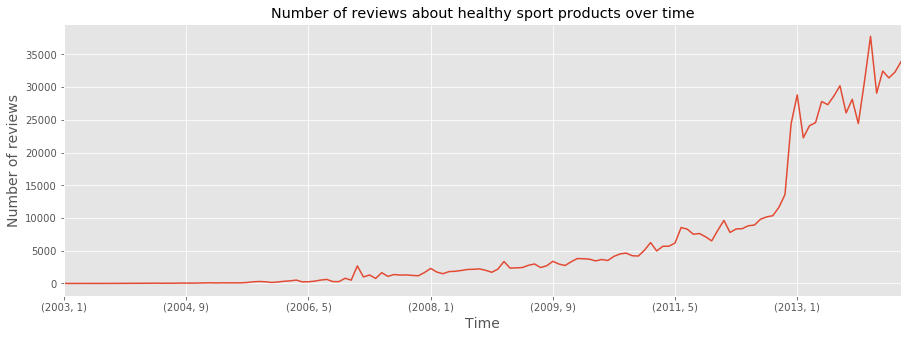

In [13]:
healthy_sports_df.groupby([healthy_sports_df.datetime.dt.year,
                           healthy_sports_df.datetime.dt.month]).agg('count')['asin'].plot(title='Number of reviews about healthy sport products over time')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Number of reviews', fontsize=14)
plt.savefig(PLOT_DIR + 'reviews_healthy_sports.pdf', bbox_inches='tight')

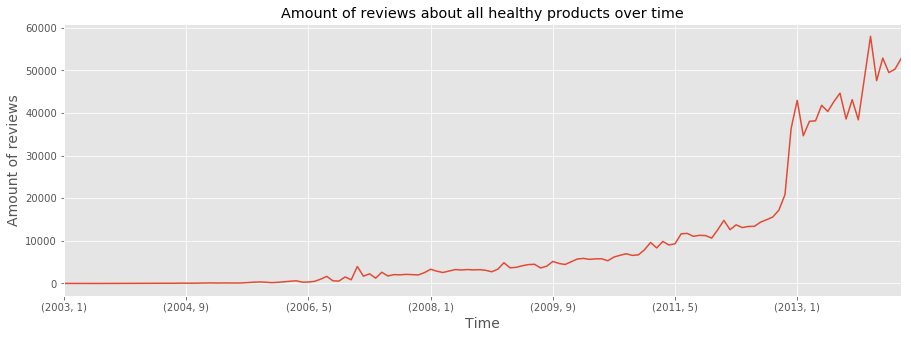

In [14]:
healthy_reviews_count = merged_healthy_df.groupby([merged_healthy_df.datetime.dt.year,
                           merged_healthy_df.datetime.dt.month]).agg('count')
healthy_reviews_count['asin'].plot(title='Amount of reviews about all healthy products over time')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amount of reviews', fontsize=14)
plt.savefig(PLOT_DIR + 'reviews_overall_healthy.pdf', bbox_inches='tight')

A **very** naive "data scientist" would conclude that healthy products are getting more hype over time. This is obviously not a good analysis, because we have to take into account the growth of Amazon (available products + unique users).

### Amazon's growth over time

Now, we want to see how Amazon has grown over the years. One way to show that is to compute the total number of reviews over time. To do so we will iterate over all file category, and create a dictionary wich contains each month with the number of reviews for the month. We then convert it to a Dataframe and show how the number of reviews growth over the time.

In [15]:
REVIEWS_DATE_FORMAT = "%m %d, %Y"
REVIEWS_GROWTH = 'reviews_count_df'
USER_COUNT = 'users_count_df'
PRODUCT_COUNT = 'products_count_df'

Loading from file...


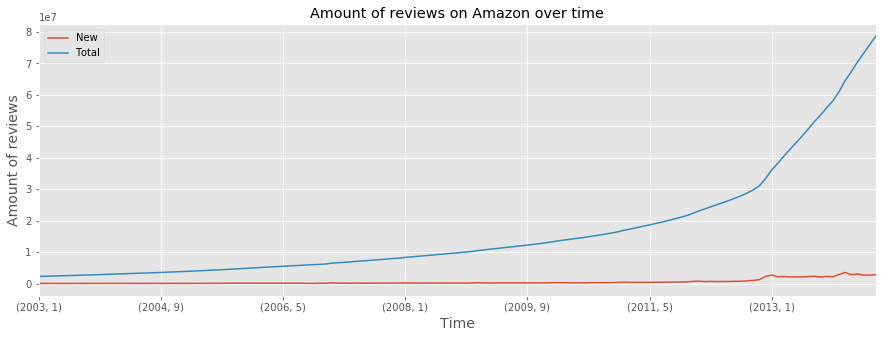

In [16]:
# Load Reviews Growth and show the graph
reviews_growth_df = loadCountData(REVIEWS_GROWTH, count_review, extra_handling='Reviews')
reviews_growth_df.plot(title='Amount of reviews on Amazon over time')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amount of reviews', fontsize=14)
plt.savefig(PLOT_DIR + 'reviews_overall.pdf', bbox_inches='tight')

The plot shows an exponential growth in the number of reviews which stabilize somehow in 2013. This may be because people review articles exponentially over the time so to be sure that the number of users grows also exponentially we do the same with the number of users.  
We assume that there is a new user as soon as he does his first review. We iterate again over the all the category files and this time keep track of the month the users make their first review. We then count the number of users for every month. This gives the number of new users over the time. We can take the cumulative sum to know the total number of client growth over the months.

Loading from file...


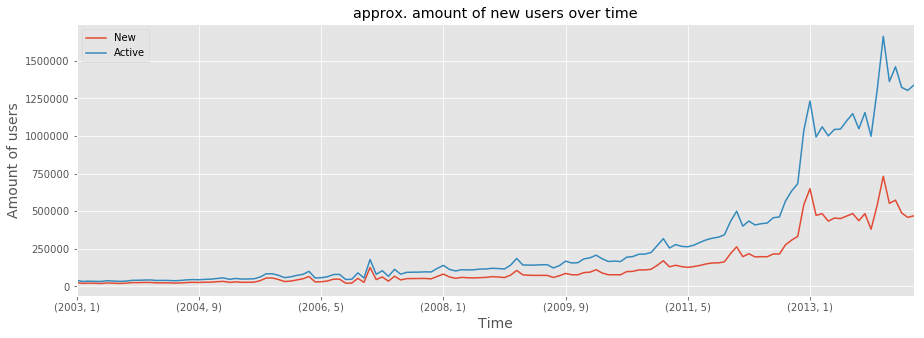

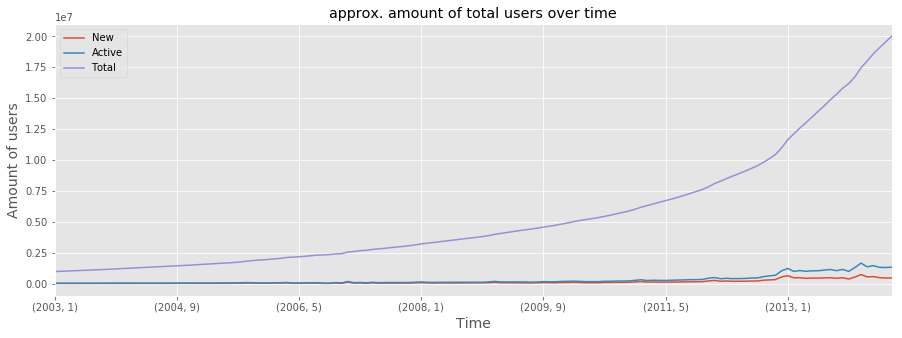

In [17]:
# Load Users Growth and show the graph
users_growth_df = loadCountData(USER_COUNT, statistics_data, get_user, 'Users')
users_growth_df[['New', 'Active']].plot(title='approx. amount of new users over time')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amount of users', fontsize=14)
plt.savefig(PLOT_DIR + 'new_users.pdf', bbox_inches='tight')
users_growth_df.plot(title='approx. amount of total users over time')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amount of users', fontsize=14)
plt.savefig(PLOT_DIR + 'total_users.pdf', bbox_inches='tight')

This time the plot shows that the number of new users grows linearly and that the total number of Amazon users grows exponentially. This means that Amazon has grown exponentially over the years. So we must find a different strategy to define if a category of products is more popular than others given the number of reviews.

We explain how we will solve this problem in our plan.

Loading from file...


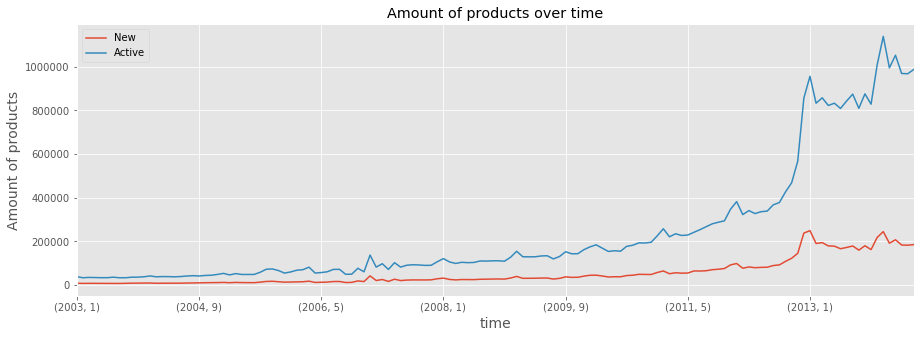

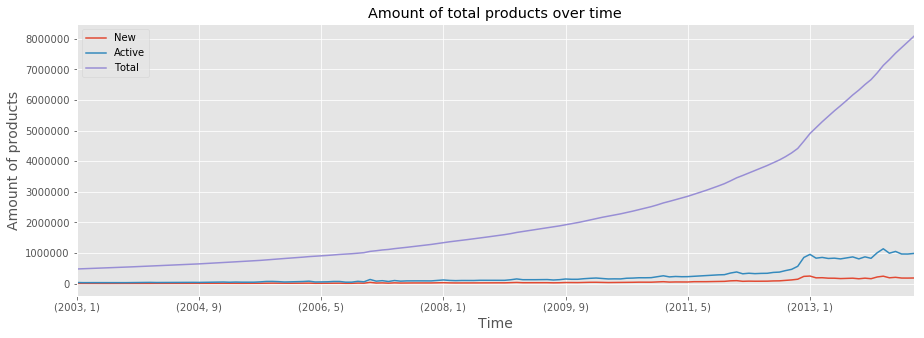

In [18]:
count_products = loadCountData(PRODUCT_COUNT,statistics_data , get_product, 'Products')
count_products[['New', 'Active']].plot(title='Amount of products over time')
plt.xlabel('time', fontsize=14)
plt.ylabel('Amount of products', fontsize=14)
plt.savefig(PLOT_DIR + 'new_products.pdf', bbox_inches='tight')
count_products.plot(title='Amount of total products over time')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amount of products', fontsize=14)
plt.savefig(PLOT_DIR + 'total_products.pdf', bbox_inches='tight')

In [19]:
healthy_meta_food_df = food_meta_df[food_meta_df.asin.isin(healthy_food_df.asin)]
healthy_meta_sport_df = sports_meta_df[sports_meta_df.asin.isin(healthy_sports_df.asin)]
merged_meta_healthy_df = pd.concat([healthy_meta_food_df, healthy_meta_sport_df])

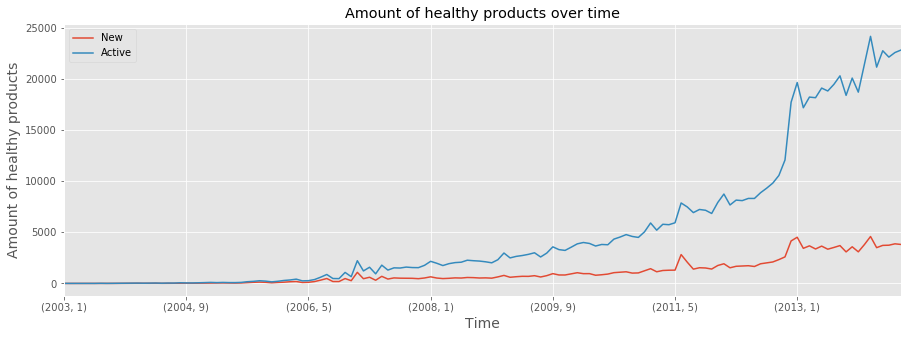

In [20]:
count_healthy_products = get_products_stat(merged_healthy_df, merged_meta_healthy_df)
count_healthy_products[['New', 'Active']].plot(title='Amount of healthy products over time')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amount of healthy products', fontsize=14)
plt.savefig(PLOT_DIR + 'total_healthy_products.pdf', bbox_inches='tight')

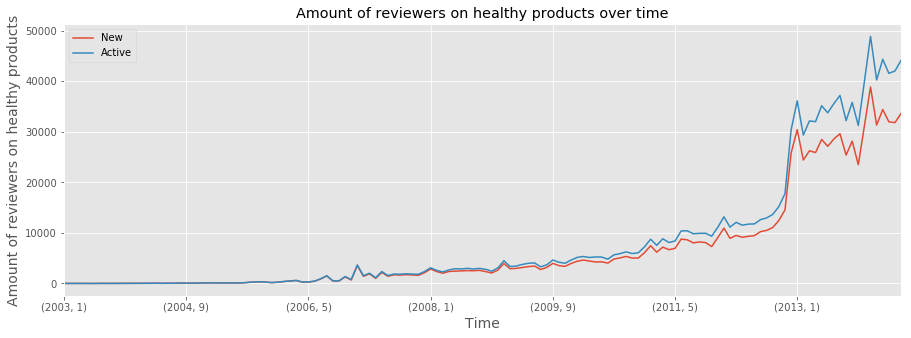

In [21]:
healthy_reviewers_count = get_reviewers_stat(merged_healthy_df)
healthy_reviewers_count[['New', 'Active']].plot(title='Amount of reviewers on healthy products over time')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amount of reviewers on healthy products', fontsize=14)
plt.savefig(PLOT_DIR + 'reviewers_healthy.pdf', bbox_inches='tight')

In [22]:
concat_reviews_df = pd.concat([food_reviews_df, sports_reviews_df])
concat_meta_df = pd.concat([food_meta_df, sports_meta_df])

In [23]:
concat_reviews_count = concat_reviews_df.groupby([concat_reviews_df.datetime.dt.year,
                                               concat_reviews_df.datetime.dt.month]).count()
concat_reviewers_count = get_reviewers_stat(concat_reviews_df)
concat_products_count = get_products_stat(concat_reviews_df, concat_meta_df)

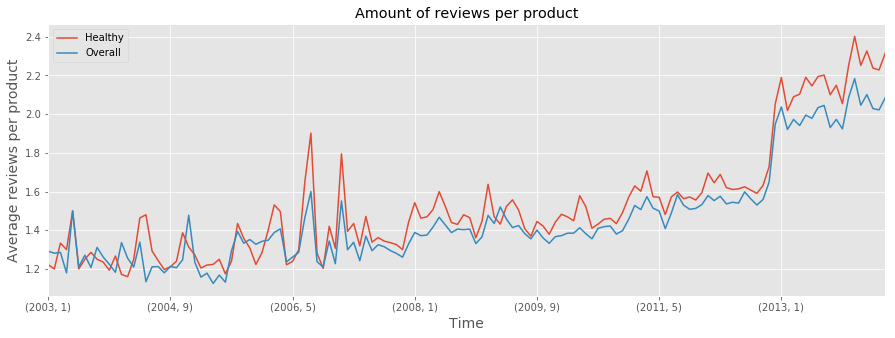

In [24]:
healthy_trend = get_trend(healthy_reviews_count, 'asin', healthy_reviewers_count, count_healthy_products, 'Healthy')
overall_trend = get_trend(concat_reviews_count, 'asin', concat_reviewers_count, concat_products_count, 'Overall')
trends_df = healthy_trend.join([overall_trend], how='outer')
trends_df.plot(title='Amount of reviews per product')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Average reviews per product', fontsize=14)
plt.savefig(PLOT_DIR + 'reviews_per_product.pdf', bbox_inches='tight')

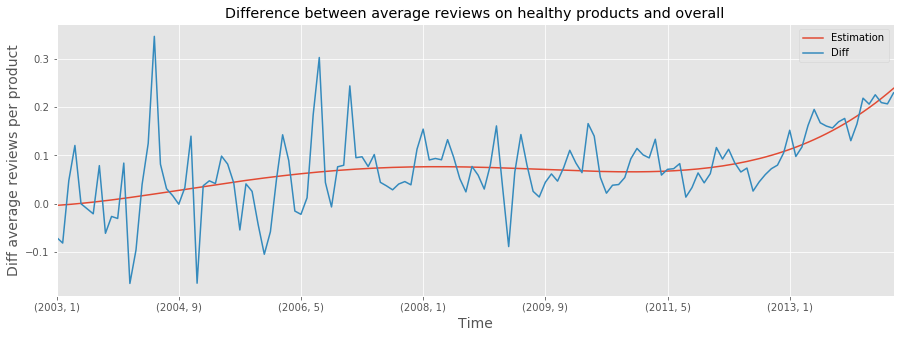

In [25]:
diff_df = get_diff_trend_and_estimation(healthy_trend, overall_trend)
diff_df.plot(title='Difference between average reviews on healthy products and overall')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Diff average reviews per product', fontsize=14)
plt.savefig(PLOT_DIR + 'diff_reviews_per_product.pdf', bbox_inches='tight')